# 분류 실습 : 캐글 신용카드 사기 검출

- Kaggle의 신용카드 데이터 세트를 이용해 신용카드 사기 검출 분류 실습  


- 데이터 다운로드 : https://www.kaggle.com/mlg-ulb/creditcardfraud  

## Credit Card Fraud Detection ML 모델 구축
- 다양한 Feature Engineering 방식을 
- Logistic Regression과 LightGBM 방식을 이용하여 
- 각 방식에 적용 후 평가 비교

### Feature Engineering 
- 피처들 중 어떤 것이 모델링할 때 중요한 것인지 결정하는 과정
- 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 굉장히 중요한 단계

### 차원 축소
- 많은 피처로 구성된 다차원의 데이터 셋을 차원을 축소하여 새로원 차원의 데이터 세트를 생성

**PCA(Principal Component Analysis) : 주성분 분석**
- 여러 변수 간 존재하는 상관관계를 이용해 대표하는 주성분을 추출해서 차원을 축소하는 기법
- 가장 높은 분산을 가지는 데이터의 축을 찾아 차원을 축소

### Log 변환
- 비대칭된 분포도를 가진 데이터 세트를 정규분포와 같이 대칭으로 변환하는 방식

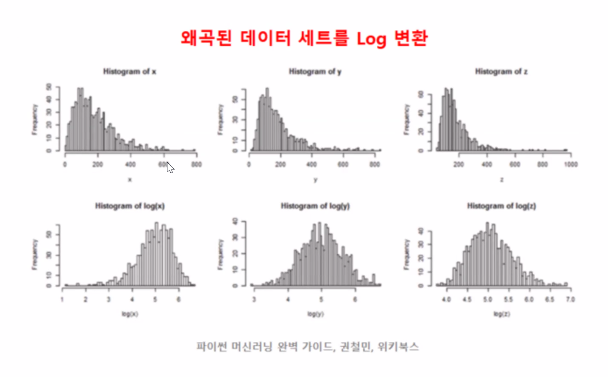

**오른쪽으로 긴 그래프는 포지티브**


제곱근, 로그, 역수변환으로 대칭으로 만들어 줄 수 있다


### 이상치 탐지
- IQR(Inter Quantile Range), 사분위수(Quantile), Boxplot을 이용
    - 최대값 : 3분위수 + 1.5 * IQR
    - 최소값 : 1분위수 - 1.5 * IQR    

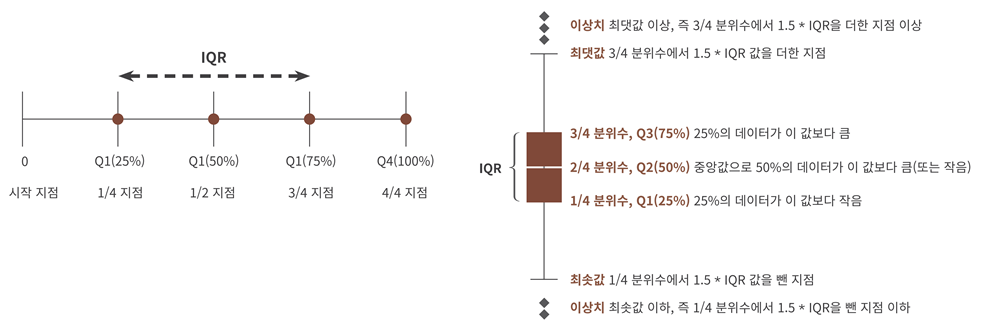

## imbalanced data set 가공을 위한 언더 샘플링/오버 샘플링

- 언더 샘플링(under sampling)
    - 많은 레이블을 가진 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식

- 오버 샘플링(over sampling)
    - 적은 레이블을 가진 데이터 세트를 많은 데이터 세트 수준으로 증식시키는 방식
    - 원본 데이터의 피처 값들을 약간만 변경하여 증식
    - 대표적인 방법: SMOTE

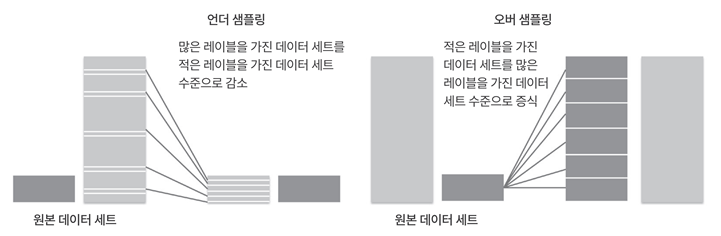

### SMOTE(Synthetic Minority Over-sample Technique)


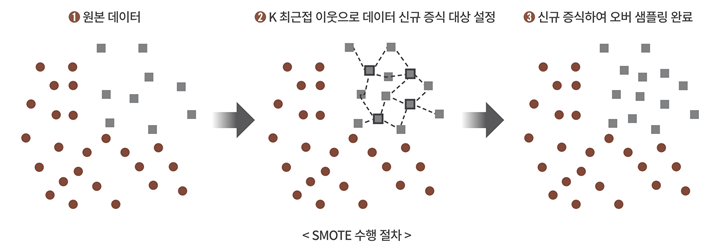

### SMOTE 방식 제공 패키지
- imblearn.over_sampling (imbalanced learn)  
- imbalanced-learn 설치 필요  
    - **`conda install -c conda-forge imbalanced-learn`**  

## 데이터 일차 가공 및 모델 학습/예측/평가

### 'creditcard.csv' 파일 데이터 로드

In [1]:
# 모듈 임포트
# 오류 메시지 안나오게 하는 코드
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 로드
card_df = pd.read_csv('./datasets/creditcard/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
card_df.shape

(284807, 31)

In [6]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**creditcard 피처 정보**
- Time : 데이터 생성 관련한 속성으로 분석에 큰 의미가 없음 => 삭제
- Amount : 신용카드 트랜잭션 금액
- Class : 레이블, 0-정상, 1-사기

### 전처리 함수 ① : get_preprocessed_df() 작성 
- 원본 DataFrame은 유지하고 데이터 가공을 위한 DataFrame을 복사하여 반환

In [8]:
# 전처리 함수
# - Time 칼럼만 삭제
# - 원본 데이터 유지하고, 복사본 반환

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

### 학습과 테스트 데이터 세트를 반환하는 함수 생성
- 사전 데이터 처리가 끝난 뒤 해당 함수 호출

**`get_train_test_dataset(df=None)`**

In [9]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X = df_copy.iloc[:, :-1]
    y = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    
    return X_train, X_test, y_train, y_test

In [10]:
# 학습 데이터 & 평가데이터 분할
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [11]:
X_train.shape

(199364, 29)

In [12]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

**학습/테스트 데이터 레이블 비율**

In [14]:
y_train.value_counts()/y_train.shape[0]*100

0    99.827451
1     0.172549
Name: Class, dtype: float64

In [15]:
y_test.value_counts()/y_test.shape[0]*100

0    99.826785
1     0.173215
Name: Class, dtype: float64

**LogisticRegression 알고리즘 적용하여 학습/예측/평가 수행**

In [17]:
# 먼저  LogisticRegression 부터 학습/예측/평가 수행
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

In [18]:
# 예측 평가 수행 함수 (3장 참고)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
 F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1: 0.7120, AUC:0.9568


### 모델을 학습/예측/평가를 위한 함수 생성
: 앞으로 피처 엔지니어링을 수행할 때마다 사용

**`def get_model_train_eval(model, X_train=None, X_test=None, y_train=None, y_test=None):`**

In [20]:
def get_model_train_eval(model, X_train=None, X_test=None, y_train=None, y_test=None):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    print(model.__class__.__name__, '결과 :', ) 
    get_clf_eval(y_test, pred, pred_proba)
    

In [21]:
get_model_train_eval(lr, X_train, X_test, y_train, y_test)

LogisticRegression 결과 :
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1: 0.7120, AUC:0.9568


### LightGBM 학습/예측/평가

- boost_from_average가 True일 경우 레이블 값이 극도로 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨

- LightGBM 2.1.0 이상 버전에서 이와 같은 현상 발생 
     - 디폴트가 True로 바뀌면서(이전에는 False)
     - True일 경우 전반적으로 좋은데
     - 레이블 값이 극도로 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨

In [ ]:
# 모듈 임포트

# LGBM 객체 생성 : n_estimator = 1000, 

# 모델 학습 / 평가

## 중요 데이터 분포도 변환 후 모델 학습/예측/평가

**중요 feature의 분포도 확인**

<AxesSubplot:xlabel='Amount', ylabel='Density'>

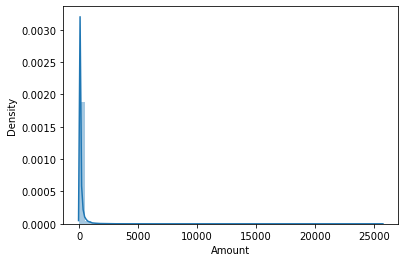

In [23]:
# Amount 분포

import seaborn as sns

sns.distplot(card_df['Amount'])

### 전처리 함수 ② get_preprocessed_df() 수정
- StandardScaler를 이용하여 Amount 피처 변환 추가

In [25]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0, 'Amount_Scaled', amount)
    df_copy.drop(['Time', Amount], axis=1, inplace=True)
    
    return df_copy

**StandardScaler 변환 후 로지스틱 회귀 및 LightGBM 학습/예측/평가**

In [ ]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 


### 전처리 함수 ③ : get_preprocessed_df() 수정
- 비대칭 분포를 갖는 Amount 피처를 로그 변환

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

---
##### log1p 와 expm1 설명  #####

In [ ]:
# log1p 와 expm1 설명 
1e-1000 == 0

In [26]:
np.log(1e-1000)

-inf

In [28]:
np.log(1e-1000 + 1)

0.0

In [29]:
np.log1p(1e-1000)

0.0

---

**Ammount 피처 로그 변환한 뒤 로지스틱회귀, LightGBM 학습/예측/평가**

In [ ]:
# 학습/테스트 데이터 분리하고

# 예측 성능 확인


    => Amount 피처 로그변환하지 않은 데이터로 학습한 경우보다 약간씩 성능이 개선됨

## 이상치 데이터 제거 후 모델 학습/예측/평가

### 각 피처들의 상관 관계 시각화 : 히트맵(heatmap)
- 결정 레이블인 class 값과 가장 상관도가 높은 피처 추출


- 추출한 다음 이 중에 상관도가 높은 피처들에 대해서 아웃 라이어 찾음


- 그 다음에 거기에 대한 아웃 라이어가 높은 피처들을 가지고 있는 레코드 삭제

In [30]:
card_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<AxesSubplot:>

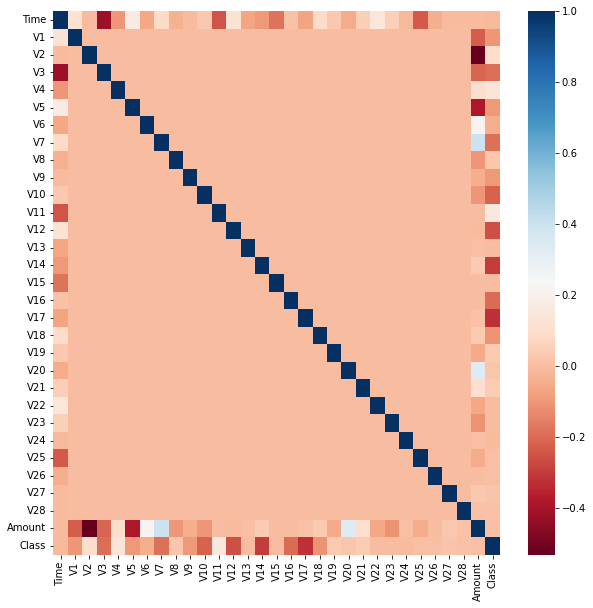

In [32]:
plt.figure(figsize=(10, 10))
# corr : 상관계수 구하는 것
sns.heatmap(card_df.corr(), cmap="RdBu")

- 히트맵에서 cmap을 'RdBu'로 설정해
    - 양의 상관관계가 높을수록 색깔이 진한 파란색에 가깝고,
    - 음의 상관관계가 높을수록 색깔이 진한 빨강색에 가깝게 표현됨

=> 레이블 Class와 상관관계가 가장 높은 피처는 V14와 V17 (음의 상관관계)

### 이상치 필터링을 위한 함수 작성 : get_outlier()
- Dataframe에서 outlier에 해당하는 데이터를 필터링
- outlier 레코드의 index를 반환함

In [33]:
# 아웃라이어를 찾기 위한 함수 생성
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25

    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 데이터 프레임 인덱스 찾음
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

**피처 V14의 분포**
- 사분위수

### 전처리 함수 ④ : get_processed_df( )
- Amount 피처 로그 변환
- V14 피처의 이상치 데이터 삭제

In [35]:
# 이상치 데이터 삭제하는 로직 추가

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0)
    return df_copy
    

### 로그변환, 이상치 제거 후 모델들을 재 학습/예측/평가

In [ ]:

print('### 로지스틱 회귀 예측 성능 ###')

print('### LightGBM 예측 성능 ###')


    => 이상치 제거 후 로지스틱 회귀와 LightGBM 모두 예측 성능이 크게 향상됨

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

###  오버샘플링된 데이터로 로지스틱 회귀로 학습/예측/평가

In [ ]:
# 증식된 데이터에 기반해서 다시 모델 학습/예측/평가 


**Precision-Recall 곡선 시각화**

In [34]:
# 3장

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

### 오버샘플링된 데이터로 LightGBM 모델 적용

In [ ]:
# 샘플링된 데이터 세트 사용


In [ ]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:, 1] )

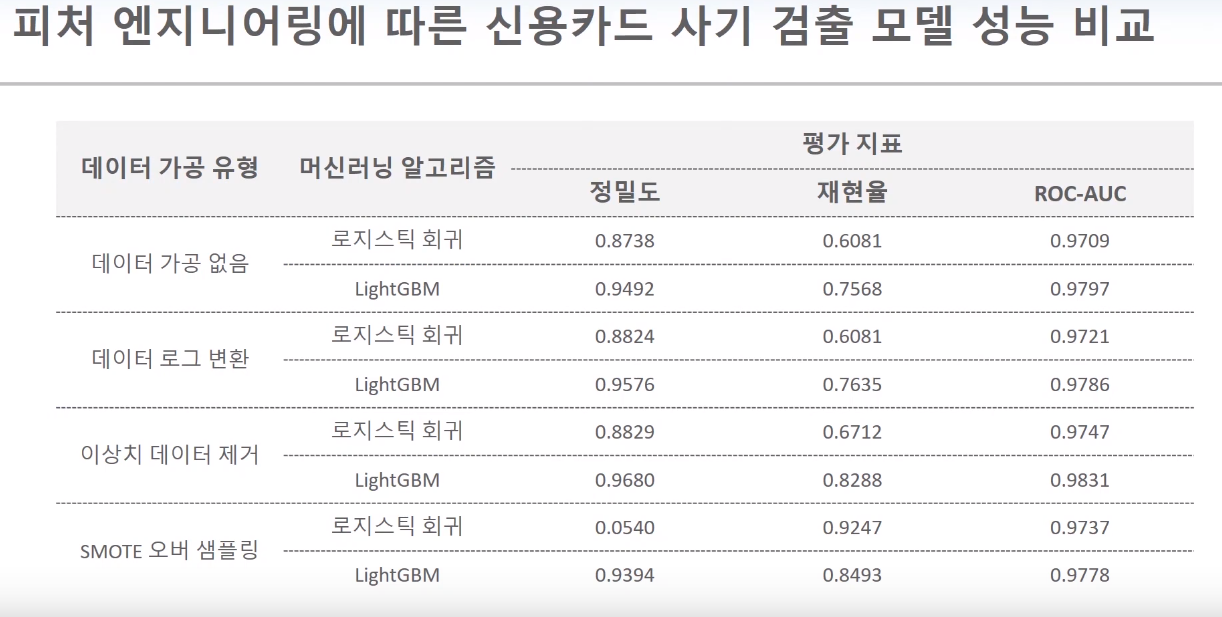